In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from parse_generators import parse_retired

In [2]:
df = parse_retired(2018)

In [3]:
summary_by_source = {}
for source in ['coal', 'natural gas']:
    grp = df.assign(
        age=df.retirement_year - df.operating_year,
        age_weighted=(df.retirement_year - df.operating_year) * df.nameplate_capacity,
    )[df.energy_source == source].groupby('retirement_year')

    summary = pd.DataFrame(dict(
        number_generators=grp.size(),
        capacity_mw=grp.nameplate_capacity.sum(),
        average_age=grp.age_weighted.sum() / grp.nameplate_capacity.sum(),
    )).loc[2002:]
    summary.index = summary.index.astype(int)
    summary_by_source[source] = summary.round().astype(int)

In [4]:
summary_by_source['coal']

,number_generators,capacity_mw,average_age
retirement_year,,,
2002,18,1030,50
2003,12,930,48
2004,8,503,54
2005,3,292,47
2006,10,505,52
2007,16,1015,50
2008,6,553,50
2009,7,479,46
2010,23,1516,50


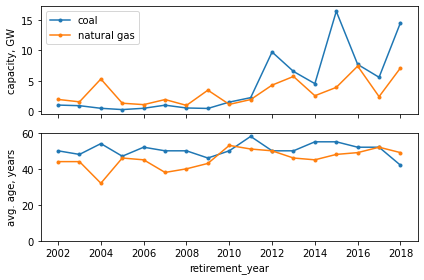

In [5]:
_, axes = plt.subplots(2, 1, sharex=True, tight_layout=True)
pd.DataFrame({k: v.capacity_mw / 1000 for k, v in summary_by_source.items()}).plot(marker='.', ax=axes[0])
pd.DataFrame({k: v.average_age for k, v in summary_by_source.items()}).plot(marker='.', ax=axes[1], legend=False)
axes[0].set_ylabel('capacity, GW');
axes[1].set_ylabel('avg. age, years');
axes[1].set_ylim(0, 60);

# other

In [8]:
df_old = parse_retired(2000)
df_ret = pd.concat([
    df_old[(df_old.retirement_year >= 1970) & (df_old.retirement_year <= 2000)],
    df[(df.retirement_year > 2000)]
]).groupby(['retirement_year', 'energy_source'])\
.nameplate_capacity.sum()\
.unstack().fillna(0)[[
    'coal', 'natural gas', 'nuclear', 'oil'
]].loc[1970:] / 1000
df_ret.index = pd.to_datetime(df_ret.index.astype(str))

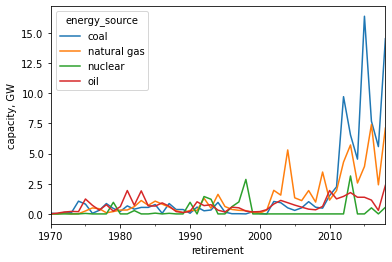

In [10]:
# still not sure if the pre-2000 data is correct - seems small, but might be right
df_ret.plot()
plt.xlabel('retirement')
plt.ylabel('capacity, GW');